Exploratory Data Analysis


In [10]:
!py -m pip install pandas
!py -m pip install numpy
!py -m pip install matplotlib
!py -m pip install spacy

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 7.8/7.8 MB 20.0 MB/s eta 0:00:00
     ---------------------------------------- 106.9/106.9 KB ? eta 0:00:00
     ------------------------------------- 211.8/211.8 KB 13.4 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 KB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 27.2 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 28.2 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
  Using cached spacy-3.8.2-cp39-cp39-win_amd64.whl (12.3 MB)
     -------------------------------------- 183.0/183.0 KB 5.6 MB/s eta 0:00:00
  Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)
     -------------------------------------- 457.0/457.0 KB 7.2 MB/s eta 0:00:00
  Using cached preshed-3.0.9-cp39-cp39-win_amd64.whl (122 kB)
     ---------------------------------------- 44.9/44.9 KB 2.2 MB/s eta 0:00:00
  Using cached weasel-0.4.1-py3-none-any.whl (50 kB)
  Using cached thinc-8.3.2-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached srsly-2.4.8-cp39-cp39-win_amd64.whl (483 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl (22 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
     ---------------------------------------- 5.4/5.4 MB 28.6 MB/s eta 0:00:00
  Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
     ------

You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import random
import re
import spacy
import numpy as np
import matplotlib.pyplot as plt
nlp = spacy.cli.download('en_core_web_sm')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [38]:
df = pd.read_csv("spam_Emails_data.csv")
df

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
...,...,...
193847,Ham,on escapenumber escapenumber escapenumber rob ...
193848,Spam,we have everything you need escapelong cialesc...
193849,Ham,hi quick question say i have a date variable i...
193850,Spam,thank you for your loan request which we recie...


In [39]:
df = df.drop_duplicates()
df

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
...,...,...
193847,Ham,on escapenumber escapenumber escapenumber rob ...
193848,Spam,we have everything you need escapelong cialesc...
193849,Ham,hi quick question say i have a date variable i...
193850,Spam,thank you for your loan request which we recie...


In [40]:
df.isnull().any()

label    False
text      True
dtype: bool

In [41]:
df = df.dropna()
df


,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
...,...,...
193847,Ham,on escapenumber escapenumber escapenumber rob ...
193848,Spam,we have everything you need escapelong cialesc...
193849,Ham,hi quick question say i have a date variable i...
193850,Spam,thank you for your loan request which we recie...


In [42]:
random.seed(10)

rand_idx = set()
while len(rand_idx) < 70000:
    rand_idx.add(random.randint(0, len(df)-1))
    
# Select the rows from df
df = df.iloc[list(rand_idx)]

In [44]:
print(df)

       label                                               text
0       Spam  viiiiiiagraaaa\nonly for the ones that want to...
131074   Ham  hi michelle , here is cook ' s bid :\nseptembe...
131075   Ham  london accounting group informed us needed tra...
3       Spam  start increasing your odds of success & live s...
1        Ham  got ice thought look az original message ice o...
...      ...                                                ...
131064   Ham  a couple of websites that you might want to ta...
131066  Spam  mcelroy fiance bicarbonate bragg plumage ursa ...
131069   Ham  speaking of housing . . . . i own a house near...
131070  Spam  alrite sick of feeling left out want to experi...
131072   Ham  iso market participants market notice november...

[70000 rows x 2 columns]


In [45]:
df.isnull().any()

label    False
text     False
dtype: bool

Data Preprocessing

In [46]:
df = pd.DataFrame(df)
df.shape

(70000, 2)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 131072
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   70000 non-null  object
 1   text    70000 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


Preprocessing with spacy

In [48]:
nlp = spacy.load("en_core_web_sm")
# Function to clean text by removing special characters and stopwords
def clean_text(text):
    # Remove special characters using regex
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Process the text with spaCy to remove stopwords
    doc = nlp(text)
    filtered_words = [token.text for token in doc if not token.is_stop]
    return ' '.join(filtered_words)

# Apply text cleaning to each specified column
columns_to_process = ['review']
for column in columns_to_process:
    df[column] = df[column].astype(str).apply(clean_text)

df.head()


KeyboardInterrupt: 

In [50]:
df.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
131074,Ham,"hi michelle , here is cook ' s bid :\nseptembe..."
131075,Ham,london accounting group informed us needed tra...
3,Spam,start increasing your odds of success & live s...
1,Ham,got ice thought look az original message ice o...


In [51]:
df["label"].value_counts()

label
Ham     36849
Spam    33151
Name: count, dtype: int64

In [52]:
import re
import spacy
from tqdm import tqdm  # For progress tracking

nlp = spacy.load("en_core_web_sm")

# Function to clean text by removing special characters, stopwords, and applying lemmatization
def clean_text(text):
    # Remove special characters using regex
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Retain only letters and spaces
    # Process the text with spaCy
    doc = nlp(text.lower())  # Convert to lowercase
    # Filter tokens: Remove stopwords and apply lemmatization
    filtered_words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(filtered_words)

# Apply text cleaning to each specified column using spaCy's nlp.pipe for batch processing
columns_to_process = ['text']
for column in columns_to_process:
    tqdm.pandas()  # Enable progress bar for apply function
    df[column] = df[column].astype(str).progress_apply(clean_text)

# Display the first few rows of the cleaned DataFrame
df.head()


100%|██████████| 70000/70000 [56:39<00:00, 20.59it/s]   


,label,text
0,Spam,viiiiiiagraaaa one want scream prodigy scrawny...
131074,Ham,hi michelle cook s bid september cook inlet s ...
131075,Ham,london accounting group inform need transfer p...
3,Spam,start increase odd success live sexually healt...
1,Ham,get ice think look az original message ice ope...


In [54]:
# Separate the classes
spam = df[df['label'] == 'Spam']
ham = df[df['label'] == 'Ham']

# Downsample the 'ham' class to match the size of the 'spam' class
ham_downsampled = ham.sample(len(spam), random_state=42)

# Combine the downsampled 'ham' class with the 'spam' class
balanced_df = pd.concat([spam, ham_downsampled])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the balanced label counts
print(balanced_df['label'].value_counts())


label
Ham     33151
Spam    33151
Name: count, dtype: int64


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=500, stop_words='english')  # Set max_features as needed

# Fit and transform the 'review' column
tfidf_matrix = tfidf.fit_transform(df['text'])

# Convert the TF-IDF matrix to a dense array (optional)
tfidf_array = tfidf_matrix.toarray()

# Create a DataFrame for the TF-IDF features
tfidf_df = pd.DataFrame(tfidf_array, columns=tfidf.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())


   able   ac  access  accord   account  act  action   ad  add  additional  \
0   0.0  0.0     0.0     0.0  0.000000  0.0     0.0  0.0  0.0         0.0   
1   0.0  0.0     0.0     0.0  0.000000  0.0     0.0  0.0  0.0         0.0   
2   0.0  0.0     0.0     0.0  0.355863  0.0     0.0  0.0  0.0         0.0   
3   0.0  0.0     0.0     0.0  0.000000  0.0     0.0  0.0  0.0         0.0   
4   0.0  0.0     0.0     0.0  0.000000  0.0     0.0  0.0  0.0         0.0   

   ...  word  work  world   wr  write  www   xp  yahoo  year  york  
0  ...   0.0   0.0    0.0  0.0    0.0  0.0  0.0    0.0   0.0   0.0  
1  ...   0.0   0.0    0.0  0.0    0.0  0.0  0.0    0.0   0.0   0.0  
2  ...   0.0   0.0    0.0  0.0    0.0  0.0  0.0    0.0   0.0   0.0  
3  ...   0.0   0.0    0.0  0.0    0.0  0.0  0.0    0.0   0.0   0.0  
4  ...   0.0   0.0    0.0  0.0    0.0  0.0  0.0    0.0   0.0   0.0  

[5 rows x 500 columns]


In [57]:
# Ensure the TF-IDF DataFrame and balanced dataset are aligned
balanced_reviews = balanced_df['text']

# Refit and transform the reviews in the balanced dataset
tfidf_balanced_matrix = tfidf.fit_transform(balanced_reviews)

# Convert to dense array and create a TF-IDF DataFrame
tfidf_balanced_array = tfidf_balanced_matrix.toarray()
tfidf_balanced_df = pd.DataFrame(tfidf_balanced_array, columns=tfidf.get_feature_names_out())

# Add the 'label' column back to the final dataset
tfidf_balanced_df['label'] = balanced_df['label'].values

# Display the final dataset
print(tfidf_balanced_df.head())


   able   ac  access  accord  account       act    action   ad  add  \
0   0.0  0.0     0.0     0.0      0.0  0.000000  0.000000  0.0  0.0   
1   0.0  0.0     0.0     0.0      0.0  0.000000  0.000000  0.0  0.0   
2   0.0  0.0     0.0     0.0      0.0  0.000000  0.000000  0.0  0.0   
3   0.0  0.0     0.0     0.0      0.0  0.000000  0.129232  0.0  0.0   
4   0.0  0.0     0.0     0.0      0.0  0.048642  0.000000  0.0  0.0   

   additional  ...  work  world   wr     write       www   xp     yahoo  \
0         0.0  ...   0.0    0.0  0.0  0.193914  0.000000  0.0  0.000000   
1         0.0  ...   0.0    0.0  0.0  0.000000  0.000000  0.0  0.000000   
2         0.0  ...   0.0    0.0  0.0  0.000000  0.191604  0.0  0.000000   
3         0.0  ...   0.0    0.0  0.0  0.000000  0.000000  0.0  0.000000   
4         0.0  ...   0.0    0.0  0.0  0.000000  0.000000  0.0  0.051574   

       year  york  label  
0  0.000000   0.0    Ham  
1  0.000000   0.0   Spam  
2  0.000000   0.0    Ham  
3  0.000000   

In [34]:
!py -m pip install scikit-learn
!py -m pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 294.9/294.9 KB 4.5 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [58]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [59]:
# Create a copy of the DataFrame
df_s = tfidf_balanced_df.copy()
df_s.head()

,able,ac,access,accord,account,act,action,ad,add,additional,...,work,world,wr,write,www,xp,yahoo,year,york,label
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.193914,0.000000,0.0,0.000000,0.000000,0.0,Ham
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,Spam
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.191604,0.0,0.000000,0.000000,0.0,Ham
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.129232,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,Ham
4,0.0,0.0,0.0,0.0,0.0,0.048642,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.051574,0.036909,0.0,Spam


SUPERVISED LEARNING - LOGISTIC REGRESSION

1. Import Required Libraries

In [82]:
!py -m pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------- 124.9/124.9 MB 10.2 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

2. Feature Selection

In [61]:
X = tfidf_balanced_df["text"] 
y = tfidf_balanced_df["label"]

In [62]:
print(X.head())
print(type(X))

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: text, dtype: float64
<class 'pandas.core.series.Series'>


In [63]:
if isinstance(X, pd.Series):
    X = X.to_frame()  # Convert Series to DataFrame

In [64]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")


Shape of X_train: (53041, 1)
Shape of y_train: (53041,)


Evaluate Model Performance

Logistic Regression Model


In [66]:
# Initialize and train the Logistic Regression model with class weights
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Logistic Regression Results:\nAccuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Generate a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Logistic Regression Results:
Accuracy: 0.5080
Confusion Matrix:
[[ 280 6380]
 [ 145 6456]]
Classification Report:
              precision    recall  f1-score   support

         Ham       0.66      0.04      0.08      6660
        Spam       0.50      0.98      0.66      6601

    accuracy                           0.51     13261
   macro avg       0.58      0.51      0.37     13261
weighted avg       0.58      0.51      0.37     13261

Cross-Validation Accuracy: 0.5083 ± 0.0010


Random Forest

In [67]:
# Define the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Random Forest Results:
Accuracy: 0.5078
Confusion Matrix:
[[ 209 6451]
 [  76 6525]]
Classification Report:
              precision    recall  f1-score   support

         Ham       0.73      0.03      0.06      6660
        Spam       0.50      0.99      0.67      6601

    accuracy                           0.51     13261
   macro avg       0.62      0.51      0.36     13261
weighted avg       0.62      0.51      0.36     13261

Cross-Validation Accuracy: 0.5084 ± 0.0009


Neural Network


In [68]:
# Define the Neural Network model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Fit the model to the training data
mlp_model.fit(X_train, y_train)

# Predict on the test data
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
print("Neural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlp_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Neural Network Results:
Accuracy: 0.5022
Confusion Matrix:
[[6660    0]
 [6601    0]]
Classification Report:


C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

         Ham       0.50      1.00      0.67      6660
        Spam       0.00      0.00      0.00      6601

    accuracy                           0.50     13261
   macro avg       0.25      0.50      0.33     13261
weighted avg       0.25      0.50      0.34     13261

Cross-Validation Accuracy: 0.5035 ± 0.0044


Gradient Boosting


In [69]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode 'negative' -> 0, 'positive' -> 1
y_test_encoded = label_encoder.transform(y_test)  # Apply the same transformation to the test set

# Define the Gradient Boosting model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Decode predictions back to the original labels for evaluation
y_pred_decoded = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate the model
print("Gradient Boosting (XGBoost) Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_decoded):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_decoded))
print("Classification Report:")
print(classification_report(y_test, y_pred_decoded))

C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [23:51:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting (XGBoost) Results:
Accuracy: 0.5088
Confusion Matrix:
[[ 235 6425]
 [  89 6512]]
Classification Report:
              precision    recall  f1-score   support

         Ham       0.73      0.04      0.07      6660
        Spam       0.50      0.99      0.67      6601

    accuracy                           0.51     13261
   macro avg       0.61      0.51      0.37     13261
weighted avg       0.61      0.51      0.37     13261



8. Visualize the Confusion Matrix

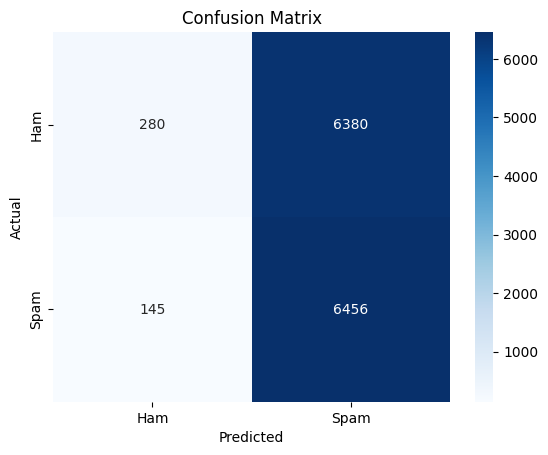

In [70]:
# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mlp_model.classes_, yticklabels=mlp_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [96]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode the target variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Encode 'negative' -> 0, 'positive' -> 1
y_test_encoded = label_encoder.transform(y_test)

# Define the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
}

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,  # Progress information
    n_jobs=-1  # Use all available cores
)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train_encoded)

# Best parameters and results
print("Best Hyperparameters:")
print(grid_search.best_params_)
print("\nBest Accuracy:")
print(grid_search.best_score_)

# Evaluate the best model on the test set
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# Decode predictions back to the original labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_decoded))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_decoded))


Fitting 3 folds for each of 6561 candidates, totalling 19683 fits


C:\Users\lisoh\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [06:19:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters:
{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.6}

Best Accuracy:
0.5105273813138982

Classification Report:
              precision    recall  f1-score   support

    negative       0.61      0.06      0.11      4936
    positive       0.51      0.96      0.66      4944

    accuracy                           0.51      9880
   macro avg       0.56      0.51      0.39      9880
weighted avg       0.56      0.51      0.39      9880


Confusion Matrix:
[[ 313 4623]
 [ 196 4748]]
